<a href="https://colab.research.google.com/github/mahdibaghbanzadeh/deepath/blob/master/tools/PubMed_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PubMed Visualization
This notebook will help you to visualize the sample output of searches trough the PubMed database.  
  
## Data format
To prepare the data:  
1. place all the data files in a directory with the following name foramt:  _**GROUPNAME(underline)SUBGROUPNAME.csv**_
2. replace the directory name with the _dat_directory_ argument in the **data_prep** function (It's default value is _pubmed_data_)

In [ ]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import datetime

In [ ]:
def data_prep(nam, start_year = 1965, dat_directory = 'pubmed_data'):
    
    df = pd.DataFrame(range(start_year, datetime.datetime.now().year+1), columns=['Year'])
    
    for file in os.listdir('./' + dat_directory + '/'):
        if file.startswith(nam):
            file_path = str('./' + dat_directory + '/' + file)
            temp = pd.read_csv(file_path, skiprows=1)
            temp.columns = ['Year', file.split('_')[-1].split('.')[0]]        
            df = df.merge(temp, how = 'left')
    df.fillna(0, inplace = True)
    return df

<Figure size 432x288 with 0 Axes>

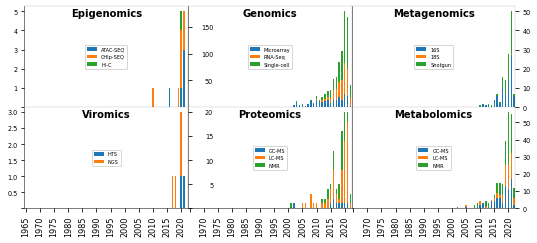

In [ ]:
name_list = ['Epigenomics', 'Genomics', 'Metagenomics', 'Viromics', 'Proteomics', 'Metabolomics']
fig=plt.figure()
fig = plt.figure(figsize=(7.2,3.2))
gs=GridSpec(4,6,wspace=0.0,hspace = 0.0)

px = []
cn = 0
for i in [0,2]:
    for j in [0,2,4]:
        
        df = data_prep(nam=name_list[cn])
        
        px.append(fig.add_subplot(gs[i:(i+2), j:(j+2)]))
        px[-1].tick_params(axis='both', which='major', labelsize=6)
        df.plot(x='Year', kind='bar',stacked = True,ax = px[-1])
        plt.xlabel("")
        
        px[-1].spines['top'].set_linewidth(0.1)
        px[-1].spines['left'].set_linewidth(0.5)
        px[-1].spines['right'].set_linewidth(0.1)
        px[-1].spines['bottom'].set_linewidth(0.5)
        px[-1].legend(loc ='center', fontsize = 5)
        
        if cn in [1, 4]:
            px[-1].tick_params(axis="y",direction="in", pad=-25)
        if cn in [2, 5]:
            px[-1].yaxis.tick_right()
        if cn <3:
            px[-1].yaxis.get_major_ticks()[0].label1.set_visible(False)
            px[-1].set_xticklabels([])
        else:
            px[-1].yaxis.get_major_ticks()[0].label1.set_visible(False)
            px[-1].set_xticks(px[-1].get_xticks()[::5])
            px[-1].xaxis.label.set_visible(False)
            if cn > 3:
                px[-1].xaxis.get_major_ticks()[0].label1.set_visible(False)
            
        px[-1].xaxis.set_tick_params(labelsize=8)#COunt
        px[-1].yaxis.set_tick_params(labelsize=6.40)#Year
        
#         tag = tag_finder(file_list[cn])
        px[-1].text(.5, .9, name_list[cn], transform=px[-1].transAxes, ha="center", weight='bold')
        cn += 1
plt.tight_layout(pad=0.05)

fig.savefig("image_omics_all_ml.pdf", dpi=350, bbox_inches = "tight")
fig.savefig("image_omics_all_ml.png", dpi=350, bbox_inches = "tight")
plt.show()